## data-512-a5 - Final Project

Sean Miller - <millsea0@u.washington.edu>

### Introduction

The purpose of this analysis is to understand how information technology (IT) workers feel about mental health issues. "Although research has gone far to understand the impact of the disease, it has only recently begun to explain stigma in mental illness. Much work yet needs to be done to fully understand the breadth and scope of prejudice against people with mental illness." [[1]](#References) Two surveys conducted by [Open Sourcing Mental Illness Ltd](https://osmihelp.org/research/) (OSMI) collected information around the perceived stigma of mental health issues as well as to "...examine the frequency of mental health disorders among tech workers."[[2]](#References). OSMI has conducted these surveys in 2014 and 2016 to identify areas where they can raise awareness around mental health in the tech community.

I will be comparing potential differences in the surveys between the two years it was run as well as analyzing if views on mental health have changed between the two years.

I am a data scientist who has been working in a variety of roles in the tech industry since 2010. Having been impacted by mental health issues myself, I believe that promoting open discussion reduces the stigma both those with and without mental illnesses hold. This analysis seeks to engage in and start such discussions.

### Data Sets

The data sets that I'll be using for this analysis are survey results collected by [OSMI](https://osmihelp.org/research/) and are made available by the [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) license. One survey was performed in 2014 and the other in 2016. Both of the surveys seek to understand how people that work in technology view mental health issues and to understand what support they receive from their employer.

OSMI has made the data sets for both the [2014 survey](https://www.kaggle.com/osmi/mental-health-in-tech-survey/data) and the [2016 survey](https://www.kaggle.com/osmi/mental-health-in-tech-2016) available on Kaggle.

To ensure open access to the data, I have uploaded the data in CSV format to [figshare](https://doi.org/10.6084/m9.figshare.5579458.v1) with a description of each column/question. In 2014 the columns were labeled by a keyword to indicate the question asked, I have provided this mapping in the [appendix](#additional-images) of this document.

### Background and Research Questions

Providing a better understanding of technology workers' views on mental health issues is inherently a human-centered project. The National Alliance on Mental Illness (NAMI) defines stigma as one person viewing another in a negative way due to a mental illness.[[3]](#References) Understanding how tech workers view this stigma and assessing the basics of services the company they work for provides allows us to start the discussion around how to reduce the stigma around the perception of mental health issues.

Within this analysis we will be exploring sentiment from IT workers about mental health and if employer provided mental health benefits have improved between the two surveys.

This brings us to our two research questions. For both, we will be using a two-sample proportion z-test to evaluate if there has been a change between the two surveys for the hypothesis we're testing.

##### RQ1: Sentiment Over Time

In this research question I want to explore if the overall sentiment of tech workers on mental health has improved from the 2014 survey to the 2016 survey. Singletary et al. determined that 13-year old children tended to perceive being healthy as meaning physical well-being as opposed to mental well-being [[6]](#References). I believe that technology workers will share this same perception.

**H1a:** More negative perception of discussing mental health.

Given the findings of Singletary et al., I also hypothesize that how people perceive the consequences of discussing mental illness with their employer has not changed between the two surveys.

**H1b:** Perception of discussing mental health between surveys hasn't changed.

To validate these hypotheses, we will be comparing the proportions of participants answers to "Do you think that discussing a mental health issue with your employer would have negative consequences?" and "Do you think that discussing a physical health issue with your employer would have negative consequences?" between surveys. Participants will be classified based on if their perception of the consequences of discussing mental health issues is greater than, less than or equal to their perception of the consequences for discussing a physical ailment.

##### RQ2: Benefit Coverage Increase

For our second research question, we want to examine if there has been an increase in coverage of mental health benefits among tech workers. As this study is primarily made up of individuals in the United States, my belief is that coverage will have increased due to benefits from The Affordable Care Act as many millions of people have gained healthcare from this bill. [[7]](#References)

**H2a:** Increase in percent of tech workers with mental health benefits.

To prove this hypothesis, we will be comparing the proportion of survey participants who answered yes to "Does your employer provide mental health benefits?" between the two surveys. We will also explore if country is a confounding variable.

### Analysis/Findings

#### Software

This analysis is conducted in [Python 3.6.0](https://www.python.org/), uses [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) to manipulate and transform data, and uses [Matplotlib](https://matplotlib.org/) for visualizations.

The analysis will be published in a [Jupyter Notebook](http://jupyter.org/) and all code used will be made available on my [GitHub](https://github.com/awfuldynne/).

All of the code will be written and tested against the default packages present in **Anaconda3 v4.4.0**. You can find a download for Anaconda and its latest versions at <https://repo.continuum.io/archive/>.

##### Data Preparation

Our first step is to import the necessary packages we'll need to perform our analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

We then suppress chained assignment warnings in Pandas and setup our folder structure. This analysis assumes that you have downloaded the data from the provided [figshare](https://doi.org/10.6084/m9.figshare.5579458.v1) link and use the same file names.

In [2]:
# SO Post: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
# We disable the chained assignment warning in Pandas as how we use DataFrames isn't impacted by this.
pd.options.mode.chained_assignment = None  # default='warn'

# If the folder raw_data doesn't already exist, create it
# raw_data is where any initial data sets are stored
if not os.path.exists("raw_data"):
    os.makedirs("./raw_data")
    
# If the folder clean_data doesn't already exist, create it
# clean_data is where any processed data sets are stored
if not os.path.exists("clean_data"):
    os.makedirs("./clean_data")

# If the folder outputs doesn't already exist, create it
# The outputs folder is where visualizations for our analysis will be stored
if not os.path.exists("outputs"):
    os.makedirs("./outputs")

In [3]:
# File names
twenty_fourteen_file = "./raw_data/mental-heath-in-tech-2014.csv"
twenty_sixteen_file = "./raw_data/mental-heath-in-tech-2016_20161114.csv"

# Read in data
twenty_fourteen_data = pd.read_csv(twenty_fourteen_file)
twenty_sixteen_data = pd.read_csv(twenty_sixteen_file)

We then reduce the DataFrames down to only the columns we require for the analyses we'll be performing and clean up the data a bit. In the 2016 data set, if a user was self-employed is encoded as a binary variable. We convert that back to a string so the data has the same expected values as the 2014 data set.

After cleaning the data, we write these files out to the *clean_data* folder.

In [4]:
# Reduce DataFrames down to only the columns we'll need. The order the columns are selected is important as it is needed
# to map properly in the clean_data_set() function
twenty_fourteen_data \
    = twenty_fourteen_data[["Age", "Country", "self_employed", "benefits", "mental_health_consequence",
                            "phys_health_consequence"]]
twenty_sixteen_data \
    = twenty_sixteen_data[["What is your age?", 
                           "What country do you live in?", 
                           "Are you self-employed?",
                           "Does your employer provide mental health benefits as part of healthcare coverage?",
                           "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
                           "Do you think that discussing a physical health issue with your employer would have negative consequences?"]]

In [5]:
def clean_data_set(df):
    """ Method used to clean OSMI mental health data sets
        This function expects the columns to be in the same order as specified by the column headers:
        ["age", "country", "self_employed", "benefits", "mental_health_consequence", "phys_health_consequence"]

    :param df: DataFrame to process
    :type df: Pandas DataFrame
    :return: Pandas DataFrame
    """
    # column header mapping
    columns = ["age", "country", "self_employed", "benefits", "mental_health_consequence", "phys_health_consequence"]

    # Rename columns
    df.columns = columns

    # Clean country names
    df = df.replace("United States of America", "United States")

    # Map self_employed to Yes/No
    df = df.replace({"self_employed": {0: "No", 1: "Yes"}})
    return df

In [6]:
# Clean our data sets
twenty_fourteen_data = clean_data_set(twenty_fourteen_data)
twenty_sixteen_data = clean_data_set(twenty_sixteen_data)

In [7]:
# Write the cleaned data sets out to disk
twenty_fourteen_data.to_csv("./clean_data/mental-heath-in-tech-2014_clean.csv", index=False)
twenty_sixteen_data.to_csv("./clean_data/mental-heath-in-tech-2016_clean.csv", index=False)

Here is an example of the 2016 data set after we have cleaned it.

In [8]:
twenty_sixteen_data.head()

,age,country,self_employed,benefits,mental_health_consequence,phys_health_consequence
0,39,United Kingdom,No,Not eligible for coverage / N/A,No,No
1,29,United States,No,No,No,No
2,38,United Kingdom,No,No,Maybe,No
3,43,United Kingdom,Yes,NaN,NaN,NaN
4,43,United States,No,Yes,Yes,Maybe


#### Data Examination

Now that we've cleaned our data sets, let's look at the distribution of countries of survey participants between the two years as well as the distribution of ages of the survey participants to understand what differences exist between the data sets prior to answering our research questions.

##### Age of Participants

For each data set, we'll plot a histogram of the distribution of ages binning by 5-year increments. For these distributions we exclude any ages below 16 years old and any age about 99 years old to remove inaccurate responses.

In [9]:
def plot_age_histogram(ages, year, output_file=None):
    """ Method used to plot a histogram of an age series

    :param ages: Series of ages to plot
    :type ages: Pandas Series
    :param year: Year of survey
    :type year: int
    :param output_file: File to output plot to
    :type output_file: string
    :return: Pandas DataFrame
    """
    # Create bins for age distribution
    age_bins = list(range(0, 101, 5))
    print("Creating histogram for year {0} with age bins of:".format(year))
    print(age_bins)
    print()

    # Create title for histogram
    title = "{0} - Age Distribution".format(year)

    # Plot histogram
    plt.figure(figsize=(12, 6))
    ax = ages.plot(kind="hist", bins=age_bins, rwidth=0.8)
    ax.set_title(title)
    ax.set_xlabel("Age (Years)")
    ax.set_ylabel("Count")
    
    if output_file:
        plt.savefig(output_file)
    plt.show()

Creating histogram for year 2014 with age bins of:
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]



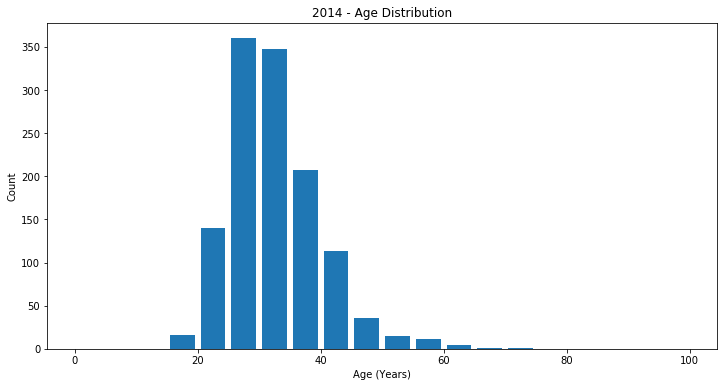

Creating histogram for year 2016 with age bins of:
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]



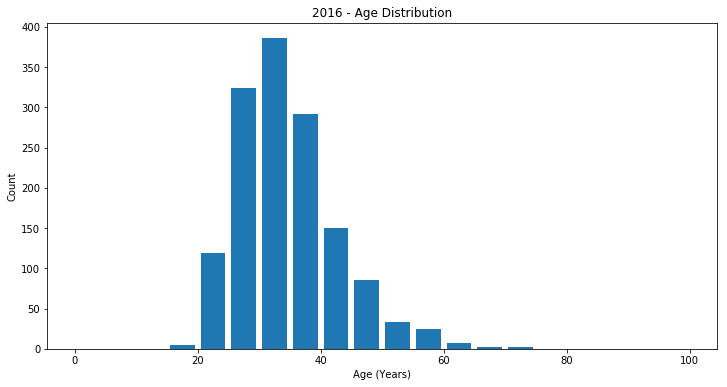

In [10]:
# Plot age distribution of each survey filtering out participants who filled in an invalind age.
plot_age_histogram(twenty_fourteen_data[(twenty_fourteen_data["age"] >= 16) & (twenty_fourteen_data["age"] < 99)].age, 2014, "./outputs/2014_age_distribution.png")
plot_age_histogram(twenty_sixteen_data[(twenty_sixteen_data["age"] >= 16) & (twenty_sixteen_data["age"] < 99)].age, 2016, "./outputs/2016_age_distribution.png")

Both data sets appear to have roughly equivalent distributions of survey participant age. The majority of participants in each survey are between the ages of 20 and 40 years old. It appears that in the 2016 survey, there were more participants in the over 40 year old range. Let's take a closer look at what these percentages actually are.

For each data set, we'll get the count of all participants, the count of participants between 20 and 40, and the count of participants over 40.

In [11]:
# Get count of participants in each data set
total_participants_twenty_fourteen = twenty_fourteen_data.shape[0]
total_participants_twenty_sixteen = twenty_sixteen_data.shape[0]

# Get count of participants between 20 and 40
twenty_to_forty_twenty_fourteen = twenty_fourteen_data[(twenty_fourteen_data["age"] < 40) 
                                                       & (twenty_fourteen_data["age"] >= 20)].shape[0]
twenty_to_forty_twenty_sixteen = twenty_sixteen_data[(twenty_sixteen_data["age"] < 40) 
                                                     & (twenty_sixteen_data["age"] >= 20)].shape[0]

# Get count of participants older than 40
over_forty_twenty_fourteen = twenty_fourteen_data[(twenty_fourteen_data["age"] >= 40)].shape[0]
over_forty_twenty_sixteen = twenty_sixteen_data[(twenty_sixteen_data["age"] >= 40)].shape[0]

# Print our results
print("The 2014 survey had {0} participants. {1}% were between 20 and 40. {2}% were over 40".format(
int(total_participants_twenty_fourteen),
np.round(twenty_to_forty_twenty_fourteen * 100 / float(total_participants_twenty_fourteen), 2),
np.round(over_forty_twenty_fourteen * 100 / float(total_participants_twenty_fourteen), 2)
))

print("The 2016 survey had {0} participants. {1}% were between 20 and 40. {2}% were over 40".format(
int(total_participants_twenty_sixteen),
np.round(twenty_to_forty_twenty_sixteen * 100 / float(total_participants_twenty_sixteen), 2),
np.round(over_forty_twenty_sixteen * 100 / float(total_participants_twenty_sixteen), 2)
))

The 2014 survey had 1259 participants. 83.72% were between 20 and 40. 14.54% were over 40
The 2016 survey had 1433 participants. 78.23% were between 20 and 40. 21.28% were over 40


##### Countries of Participants

Next, we'll look at the top ten countries with the most participants in each survey and see if there are any major differences. We'll provide a plot for each data set and then note any major differences.

In [12]:
# Group each data set by country
twenty_fourteen_country_group = twenty_fourteen_data.groupby("country")
twenty_sixteen_country_group = twenty_sixteen_data.groupby("country")

In [13]:
# Define methods to generate aggregate statistics
def number_of_participants(group):
    return group.shape[0]

# We add a constant column for percent_of_participants as .apply() then returns a DataFrame and not a Series
def get_aggregate_stats(group):
    return pd.Series({"number_of_participants": number_of_participants(group),
                      "percent_of_participants": 0})

In [14]:
# Apply aggregation to 2014 data set and fill in percent_of_participants column
twenty_fourteen_agg_df = twenty_fourteen_country_group.apply(get_aggregate_stats)
twenty_fourteen_agg_df["percent_of_participants"] = \
    twenty_fourteen_agg_df["number_of_participants"] * 100 / float(twenty_fourteen_data.shape[0])

# Apply aggregation to 2016 data set and fill in percent_of_participants column
twenty_sixteen_agg_df = twenty_sixteen_country_group.apply(get_aggregate_stats)
twenty_sixteen_agg_df["percent_of_participants"] = \
    twenty_sixteen_agg_df["number_of_participants"] * 100 / float(twenty_sixteen_data.shape[0])

Here is an example of the aggregate 2016 data set.

In [15]:
twenty_sixteen_agg_df.head()

,number_of_participants,percent_of_participants
country,,
Afghanistan,2,0.139567
Algeria,1,0.069784
Argentina,1,0.069784
Australia,35,2.442428
Austria,4,0.279135


In [21]:
def plot_top_ten_countries(agg_df, year, output_file=None):
    """ Method used to plot the top 10 countries

    :param agg_df: DataFrame aggregated by country
    :type agg_df: Pandas DataFrame
    :param year: Year of survey
    :type year: int
    :param output_file: File to output plot to
    :type output_file: string
    :return: None
    """
    # SO Post: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    fig = plt.figure(figsize=(8, 6))
    ax = agg_df["number_of_participants"].plot(kind="bar")
    ax.set_title("Participants - Top 10 Countries - {}".format(year))
    ax.set_xlabel("Country")
    ax.set_ylabel("Count")
    ax.set_xticklabels(agg_df.index)

    fig.tight_layout()

    # Add labels to chart
    rects = ax.patches
    labels = np.round(agg_df["percent_of_participants"], 2)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + .3, "{}%".format(label), ha='center', va='bottom')
    
    if output_file:
        plt.savefig(output_file)
    plt.show()

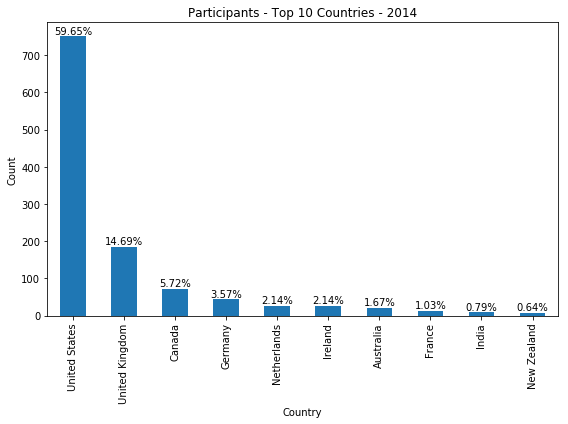

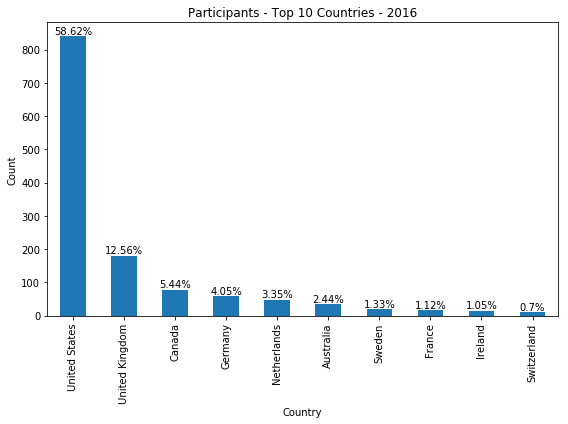

In [22]:
# Plot top 10 countries % of survey population
plot_top_ten_countries(twenty_fourteen_agg_df.sort_values("percent_of_participants", ascending=False).head(10), 2014, "./outputs/2014_top_10_countries.png")
plot_top_ten_countries(twenty_sixteen_agg_df.sort_values("percent_of_participants", ascending=False).head(10), 2016, "./outputs/2016_top_10_countries.png")

In both 2014 and 2016, the United States makes up the majority of the surveys' participants at 59.65% and 58.62% respectively. Also in both surveys, the top five countries in order are United States, United Kingdom, Canada, Germany and the Netherlands.

Next, we'll look at the percent of the population that the top ten countries make up. For both 2014 and 2016 the top ten countries make up just over 90% of the population.

In [18]:
# Percent of population made up by the top 10 countries
tf_pct = twenty_fourteen_agg_df.sort_values("percent_of_participants", ascending=False).head(10)["percent_of_participants"].sum()
ts_pct = twenty_sixteen_agg_df.sort_values("percent_of_participants", ascending=False).head(10)["percent_of_participants"].sum()

print("2014 - Percent of Population of Top 10 Countries: {}%".format(np.round(tf_pct, 2)))
print("2016 - Percent of Population of Top 10 Countries: {}%".format(np.round(ts_pct, 2)))

2014 - Percent of Population of Top 10 Countries: 92.06%
2016 - Percent of Population of Top 10 Countries: 90.65%


##### Research Question 1 (RQ1)

For the first research question, we have two hypotheses:

**H1a:** More negative perception of discussing mental health.

**H1b:** Perception of discussing mental health between surveys hasn't changed.

The metric we'll be using to establish a survey participant's view on mental health will use the answers to "Do you think that discussing a mental health issue with your employer would have negative consequences?" and "Do you think that discussing a physical health issue with your employer would have negative consequences?" For each question a user can answer "Yes", "No", "Maybe" or in the 2016 survey, they could opt to leave the questions blank. If they opted out of either question, we will filter that out for our analysis.

The way the metric is established is by comparing the participant's answers. For example, if a user answered "Yes" to the question about discussing mental health and "No" to the question about discussing physical health, the user would be categorized as perceiving mental health more negatively. If the inverse was true, then the user would be categorized as perceiving mental health less negatively.

We'll first look at the distributions for each survey to answer **H1a**. We use the function *get_perception_of_mental_health_score* to create our aggregated DataFrame. We then plot the results.

In [24]:
def get_perception_of_mental_health_score(df):
    """ Method used to create DataFrame of perceived mental health views

    :param df: Cleaned mental health survey DataFrame
    :type df: Pandas DataFrame
    :return: Aggregated Pandas DataFrame of mental health perception buckets and statistics
    """
    # For 2014, we expect the values of Yes/No/Maybe
    # For 2016, we expect the values of Yes/No/Maybe/nan
    # Initialize dictionary of counts. A perception of mental health can either be more negative, less negative or
    # equivalent. Equivalent values are broken out by the three answers
    mental_health_perception_counts = {"more_neg": 0, "equal_yes": 0, "equal_maybe": 0, "equal_no": 0, "less_neg": 0}

    # Filter out any nan values
    df = df[~((pd.isnull(df["mental_health_consequence"])) | (pd.isnull(df["phys_health_consequence"])))]

    # Go over each row in the data set and increment the count in the dict
    for index, row in df.iterrows():
        # If the user perceives discussing mental health issues at work to definitely have consequences
        if row["mental_health_consequence"] == "Yes":
            # And perceives discussing physical health issues to have the same consequences
            if row["phys_health_consequence"] == "Yes":
                mental_health_perception_counts["equal_yes"] += 1
            # Or possible consequences
            elif row["phys_health_consequence"] == "Maybe":
                mental_health_perception_counts["more_neg"] += 1
            # Or no consequences
            else:
                mental_health_perception_counts["more_neg"] += 1
        # If the user perceives discussing mental health issues at work to possibly have consequences
        elif row["mental_health_consequence"] == "Maybe":
            # And perceives discussing physical health issues to have more consequences
            if row["phys_health_consequence"] == "Yes":
                mental_health_perception_counts["less_neg"] += 1
            # Or possible consequences
            elif row["phys_health_consequence"] == "Maybe":
                mental_health_perception_counts["equal_maybe"] += 1
            # Or no consequences
            else:
                mental_health_perception_counts["more_neg"] += 1
        # If the user perceives discussing mental health issues at work to not have consequences
        elif row["mental_health_consequence"] == "No":
            # And perceives discussing physical health issues to have more consequences
            if row["phys_health_consequence"] == "Yes":
                mental_health_perception_counts["less_neg"] += 1
            # Or possible consequences
            elif row["phys_health_consequence"] == "Maybe":
                mental_health_perception_counts["less_neg"] += 1
            # Or no consequences
            else:
                mental_health_perception_counts["equal_no"] += 1

    # Create results DataFrame to return
    columns = ["perception", "count", "percent_of_total"]
    # Count of participants that answered both questions
    total = np.sum([mental_health_perception_counts[item] for item in mental_health_perception_counts])
    # Create a new DataFrame
    results_df = pd.DataFrame(columns=columns)

    # Iterate through dictionary adding a new row to the results DataFrame
    for item in mental_health_perception_counts:
        # Create a new row to be added to the results DataFrame
        new_row = pd.Series(index=columns)
        # Set the name of the row
        new_row["perception"] = item
        # Set the count of participants in this bucket
        new_row["count"] = mental_health_perception_counts[item]
        # Set the percent of participants in this bucket
        new_row["percent_of_total"] = np.round(mental_health_perception_counts[item] / float(total), 4)
        # Append the new row
        results_df = results_df.append(new_row, ignore_index=True)

    return results_df

In [25]:
# Generate aggregate mental health perception DataFrames
twenty_fourteen_perception = get_perception_of_mental_health_score(twenty_fourteen_data)
twenty_sixteen_perception = get_perception_of_mental_health_score(twenty_sixteen_data)

In [26]:
def plot_mental_health_perception(agg_df, year, output_file=None):
    """ Method used to plot DataFrame of perceived mental health views

    :param agg_df: Aggregated Pandas DataFrame of mental health perception buckets
    :type agg_df: Pandas DataFrame
    :param year: Year of survey
    :type year: int
    :param output_file: File to output plot to
    :type output_file: string
    :return: None
    """    
    # SO Post: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    fig = plt.figure(figsize=(8, 6))
    ax = agg_df.sort_values("count", ascending=False)["count"].plot(kind="bar")
    ax.set_title("Mental Health Perception - {}".format(year))
    ax.set_xlabel("Perception")
    ax.set_ylabel("Count")
    ax.set_xticklabels(agg_df.sort_values("count", ascending=False)["perception"])

    fig.tight_layout()

    # Add labels to chart
    rects = ax.patches
    labels = np.round(agg_df.sort_values("count", ascending=False)["percent_of_total"] * 100, 2)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + .3, "{}%".format(label), ha='center', va='bottom')

    if output_file:
        plt.savefig(output_file)
    plt.show()

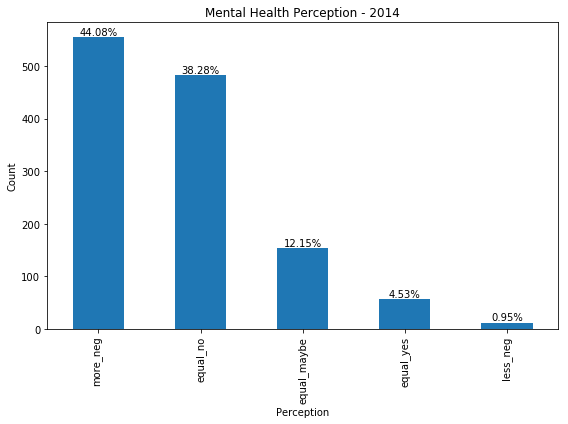

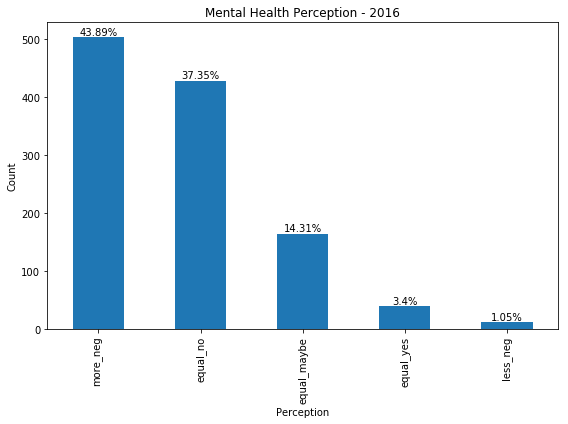

In [27]:
# Plot the results
plot_mental_health_perception(twenty_fourteen_perception, 2014, "./outputs/2014_mental_health_perception.png")
plot_mental_health_perception(twenty_sixteen_perception, 2016, "./outputs/2016_mental_health_perception.png")

The results from both of the surveys line up with our hypothesis **H1a**, that people tend to have a more negative association with discussing mental health in the workplace than discussing physical health. I find it surprising that the second most common result in both surveys was that people felt like there wouldn't be any consequences around discussing physical or mental health at work.

Now let's compare the proportion between the surveys to see if **H1b** holds as well.

In [38]:
def mental_health_perception_proportion_test(twenty_fourteen_df, twenty_sixteen_df):
    """ Method used to compare proportions of more negative mental health perception

    :param twenty_fourteen_df: 2014 DataFrame to process
    :type twenty_fourteen_df: Pandas DataFrame
    :param twenty_sixteen_df: 2016 DataFrame to process
    :type twenty_sixteen_df: Pandas DataFrame
    :return: p-value of two-sample proportion z-test
    """
    # Get counts for how many participants are in the more negative bucket    
    tf_more_neg_count = twenty_fourteen_df[twenty_fourteen_df["perception"] == "more_neg"]["count"].sum()
    ts_more_neg_count = twenty_sixteen_df[twenty_sixteen_df["perception"] == "more_neg"]["count"].sum()
    
    # Get total participant count
    tf_count = twenty_fourteen_df["count"].sum()
    ts_count = twenty_sixteen_df["count"].sum()

    # Generate p-value
    stat, pval = \
        proportions_ztest(np.array([tf_more_neg_count, ts_more_neg_count]),
                          np.array([tf_count, ts_count]),
                          0)
    return pval

In [51]:
pval = mental_health_perception_proportion_test(twenty_fourteen_perception, twenty_sixteen_perception)
print("P-value for two-sample proportion z-test: {}".format(np.round(pval, 5)))

P-value for two-sample proportion z-test: 0.92499


Given our P-value of 0.925, the difference between the percent of people that have a greater stigma around discussing mental health in the workplace is not significantly different between the two studies.

##### Research Question 2 (RQ2)

For the second research question, we have one hypothesis:

**H2a:** Increase in percent of tech workers with mental health benefits.

For each of the following filters, we will see if there was an increase in coverage of mental health benefits between the two surveys: the entire data set and within the United States versus outside the United States. We will be using the same two-sample proportion z-test that we used before but instead will be strictly checking that 2016 has a larger proportion than 2014.

In [53]:
def mental_health_benefits_proportion_test(twenty_fourteen_df, twenty_sixteen_df):
    """ Method used to compare proportion of survey participants with mental health benefits

    :param twenty_fourteen_df: 2014 DataFrame to process
    :type twenty_fourteen_df: Pandas DataFrame
    :param twenty_sixteen_df: 2016 DataFrame to process
    :type twenty_sixteen_df: Pandas DataFrame
    :return: p-value of two-sample proportion z-test
    """
    # Get counts for all participants filtering out NaN
    tf_benefit_participant_count = twenty_fourteen_df[~pd.isnull(twenty_fourteen_df["benefits"])].shape[0]
    ts_benefit_participant_count = twenty_sixteen_df[~pd.isnull(twenty_sixteen_df["benefits"])].shape[0]
    # Get counts for users with coverage
    tf_benefit_with_coverage_count = twenty_fourteen_df[twenty_fourteen_df["benefits"] == "Yes"].shape[0]
    ts_benefit_with_coverage_count = twenty_sixteen_df[twenty_sixteen_df["benefits"] == "Yes"].shape[0]

    # Print information about proportion for each year
    print("2014 Proportion: {}".format(
        np.round(tf_benefit_with_coverage_count / float(tf_benefit_participant_count), 2)))
    print("2016 Proportion: {}".format(
        np.round(ts_benefit_with_coverage_count / float(ts_benefit_participant_count), 2)))
    print()

    # Generate p-value
    stat, pval = \
        proportions_ztest(np.array([tf_benefit_with_coverage_count, ts_benefit_with_coverage_count]),
                          np.array([tf_benefit_participant_count, ts_benefit_participant_count]),
                          0,
                          alternative="smaller")
    return pval

First, we'll look at the proportion for each entire data set. 

Given the p-value of 0.000014 (1.4e^-5), our result is statistically significant that mental health coverage has increased from 2014 to 2016.

In [58]:
pval = mental_health_benefits_proportion_test(twenty_fourteen_data, twenty_sixteen_data)
print("P-value for two-sample proportion z-test: {0:7f}".format(np.round(pval, 7)))

2014 Proportion: 0.38
2016 Proportion: 0.46

P-value for two-sample proportion z-test: 1.37e-05


Next, we'll look at mental health benefits coverage inside and outside of the United States to see if country is a confounding variable.

For both inside and outside the United States, we see an increase in coverage of mental health benefits between the two surveys. Both results are found to be statistically significant.

We also look at coverage inside the United Kingdom as given that they have universal healthcare through the National Health Service (NHS), we would expect coverage to have been universal and not to have increased like the data shows.

In [78]:
print("Coverage in the United States")
pval = \
    mental_health_benefits_proportion_test(
        twenty_fourteen_data[twenty_fourteen_data["country"] == "United States"], 
        twenty_sixteen_data[twenty_sixteen_data["country"] == "United States"])
print("P-value for two-sample proportion z-test: {0:7f}".format(np.round(pval, 7)))

print()
print("Coverage outside the United States")
pval = \
    mental_health_benefits_proportion_test(
        twenty_fourteen_data[twenty_fourteen_data["country"] != "United States"], 
        twenty_sixteen_data[twenty_sixteen_data["country"] != "United States"])
print("P-value for two-sample proportion z-test: {0:7f}".format(np.round(pval, 7)))

print()
print("Coverage inside the United Kingdom")
pval = \
    mental_health_benefits_proportion_test(
        twenty_fourteen_data[twenty_fourteen_data["country"] == "United Kingdom"], 
        twenty_sixteen_data[twenty_sixteen_data["country"] == "United Kingdom"])
print("P-value for two-sample proportion z-test: {0:7f}".format(np.round(pval, 7)))

Coverage in the United States
2014 Proportion: 0.53
2016 Proportion: 0.6

P-value for two-sample proportion z-test: 0.002257

Coverage outside the United States
2014 Proportion: 0.16
2016 Proportion: 0.24

P-value for two-sample proportion z-test: 0.000915

Coverage inside the United Kingdom
2014 Proportion: 0.11
2016 Proportion: 0.22

P-value for two-sample proportion z-test: 0.004048


For both the entire data set and when broken out by within the United States or outside of the United States, the proportion of individuals that reported having mental health benefits increased from the 2014 survey to the 2016 survey so **H2a** is supported.

### Discussion/Limitations

##### Limitations of Study

Some of the potential limitations of the results of the analysis stem from how the data were collected. The survey was promoted through OSMI's Twitter [[4]](#References) and sites focusing on mental health issues in the tech industry like [BlueHackers](http://bluehackers.org/2016/04/02/osmi-mental-health-in-tech-survey-2016). Individuals that are likely to visit these sites or to follow OSMI on Twitter would seemingly be more likely to be open about discussing mental health issues.

All data provided in the survey was self-reported and the majority of responses in both surveys come from the United States (59.7% in 2014 and 58.6% in 2016).

While both surveys contain the same subset of questions, the 2016 survey contains many more questions than the 2014 survey and allows the user to go into greater detail to qualify their answers. This limits our ability to compare the more qualitative answers users had the option to provide. The questions that are similar between the surveys generally provided a Yes/No/Maybe response. The results of this analysis for quantifying sentiment around mental health issues should be understood alongside the potential biases of the data sets given these limitations.

##### Importance of Findings

The first question one should ask after reading this analysis is "Why do people tend to view discussing mental health as having more consequences than discussing physical health in the workplace?" Beginning to discuss why people tend to have this attitude is the first step in shifting the perception of discussing mental health to not carry as much of a stigma. It is surprising that the second most common perception around discussing physical and mental health in the workplace was that there would not be consequences for such discussions. In the section below, we suggest that increasing the range of answers for these questions would potentially lead to clearer results for the metric we devised.

It is heartening to see that mental health coverage has increased between the two surveys but that finding should be taken with a grain of salt given the noted limitations in how this data was collected. A more thorough survey conducted through a government agency would give a better sense of how coverage has changed.

##### Future Research Questions/Suggestions

Due to the brevity of this study, there are several outstanding questions that weren't covered in the analysis. The foremost was that given mental health care coverage increased between the two studies and that our metric for perception of discussing mental health didn't change, "How long does it take for the stigma around discussing mental health to lessen given that access to mental health care is more available?" It would also be interesting to investigate if there is a correlation between factors such as age or country of origin that shift the distribution of perception around discussing mental health.

In regards to the limitations of the study, it would be beneficial to future research if the survey included a question about how users found the survey so that future surveys could be promoted from a larger variety of sources. It would also help if the range of answers was quantifiable rather than qualitative. This would provide a more precise scale for a survey participant to express their opinion around the perceived consequences around discussing mental or physical health in the workplace.

### Conclusion

| Hypothesis | Description | Supported? |
| ---------- | ----------- | ---------- |
| **H1a** | Survey participants will have a more negative perception around discussing mental health. | Yes |
| **H1b** | Perception of discussing mental health between surveys hasn't changed. | Yes |
| **H2a** | Increase in percent of tech workers with mental health benefits. | Yes |

##### Research Question 1

In our first research question we sought to analyze if the overall sentiment of tech workers surveyed had improved between the 2014 and 2016 surveys. We found that within both surveys tech workers more often had a more negative perception of discussing mental health within the workplace than discussing physical health. We showed that there was not a statistically significant difference in the proportion of survey participants that had a more negative perception of discussing mental health between the two surveys. Both **H1a** and **H1b** were supported.

##### Research Question 2

In the second research question we examined if a larger percent of participants in the 2016 survey had mental health coverage than in the 2014 survey. We found that in 2016 a larger proportion of survey participants reported that they had mental health benefits. We also found that this was true within and outside the United States. **H2a** was supported.

##### Understanding of Human-Centered Data Science

The primary goal of this report is to foster discussions about the stigma around openly discussing mental health issues. We specifically take a look into this stigma within the tech industry through surveys provided by OSMI. In this case, understanding that the surveyed workers tended to view discussing mental health issues as having more potential consequences than discussing physical health issues opens the door to discuss why that might be the case. This is inherently human-centered as two of the values of human-centered data science are *openness* and *social impact*.

### References

[1] CORRIGAN, PATRICK W, and AMY C WATSON. “Understanding the Impact of Stigma on People with Mental Illness.” World Psychiatry 1.1 (2002): 16–20. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1489832/#B13. Accessed 5 Nov. 2017.

[2] Ltd, Open Sourcing Mental Illness. “Research :: Open Sourcing Mental Illness” 2015-2017, [www.osmihelp.org/research](www.osmihelp.org/research). Accessed 5 Nov. 2017.

[3] National Alliance on Mental Illness. "StigmaFree" 2017, <https://www.nami.org/stigmafree>. Accessed 5 Nov. 2017.

[4] Ed Finkler. "The 2016 @OSMIhelp Mental Health in Tech survey is NOW LIVE! Please take & share w colleagues! http://j.mp/osmisurvey2016  #MentalHealthInTech" <https://twitter.com/funkatron/status/709376847600099328>. 14 Mar 2016 6:53 AM. Tweet.

[5] Ltd, Open Sourcing Mental Illness. "OSMI Mental Health in Tech Survey 2016" 2016, <https://cojfunkatroncom.typeform.com/to/Ao6BTw>. Accessed 5 Nov. 2017.

[6] Singletary et al. "Young people’s perceptions of mental and physical health in the context of general wellbeing." Abstract. Health Education Journal Vol 74, Issue 3, pp. 257 - 269. First Published June 4, 2014. <http://journals.sagepub.com/doi/10.1177/0017896914533219>. Accessed 6 Nov. 2017.

[7] U.S. Department of Health & Human Services. "Health Insurance Coverage and the Affordable Care Act, 2010-2016". 2016. <https://aspe.hhs.gov/pdf-report/health-insurance-coverage-and-affordable-care-act-2010-2016>. Accessed 6 Nov. 2017.

### Appendix

###### Data Set Descriptions

**2014 Survey**

| Column Name | Question | Data Description/Values Overview |
| ---------------- | -------- | ---------------- |
| Timestamp | N/A | Timestamp the survey was submitted |
| Age | What is your age? | Number of years old the person is |
| Gender | What is your gender? | String stating gender of the person |
| Country | What country do you live in? | Country the person lives in |
| state	| If they live in the United States, what state do they live in? | Full name of state |
| self_employed | Are you self-employed? | Yes/No/NA |
| family_history | Do you have a family history of mental illness? | Yes/No |
| treatment | Have you sought treatment for a mental health condition? | Yes/No |
| work_interfere | If you have a mental health condition, do you feel that it interferes with your work? | Never/Rarely/Sometimes/Often/NA |
| no_employees | How many employees does your company or organization have? | Category for number of employees (e.g. "100-500") |
| remote_work | Do you work remotely (outside of an office) at least 50% of the time? | Yes/No |
| tech_company | Is your employer primarily a tech company/organization? | Yes/No |
| benefits | Does your employer provide mental health benefits? | Yes/No/Don't Know |
| care_options | Do you know the options for mental health care your employer provides? | Yes/No/Not Sure |
| wellness_program | Has your employer ever discussed mental health as part of an employee wellness program? | Yes/No/Don't Know |
| seek_help | Does your employer provide resources to learn more about mental health issues and how to seek help? | Yes/No/Don't Know |
| anonymity | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? | Yes/No/Don't Know |
| leave | How easy is it for you to take medical leave for a mental health condition? | Very Difficult/Somewhat Difficult/Somewhat Easy/Very Easy/Don't Know |
| mental_health_consequence | Do you think that discussing a mental health issue with your employer would have negative consequences? | Yes/No/Maybe |
| phys_health_consequence | Do you think that discussing a physical health issue with your employer would have negative consequences? | Yes/No/Maybe |
| coworkers | Would you be willing to discuss a mental health issue with your coworkers? | Yes/No/Some |
| supervisor | Would you be willing to discuss a mental health issue with your direct supervisor(s)? | Yes/No/Some |
| mental_health_interview | Would you bring up a mental health issue with a potential employer in an interview? | Yes/No/Maybe |
| phys_health_interview | Would you bring up a physical health issue with a potential employer in an interview? | Yes/No/Maybe |
| mental_vs_physical | Do you feel that your employer takes mental health as seriously as physical health? | Yes/No/Don't Know |
| obs_consequence | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? | Yes/No |
| comments | N/A | Any additional comments the person had or NA |

**2016 Survey**

| Column Name/Question | Data Description/Values Overview |
| -------------------- | ----------------------- |
| Are you self-employed? | Boolean value |
| How many employees does your company or organization have? | Category for number of employees (e.g. "100-500") |
| Is your employer primarily a tech company/organization? | Boolean value or blank |
| Is your primary role within your company related to tech/IT? | Boolean value or blank |
| Does your employer provide mental health benefits as part of healthcare coverage? | Yes/No/Not eligible/I don't know or blank |
| Do you know the options for mental health care available under your employer-provided coverage? | Yes/No/NA/Not sure or blank |
| Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? | Yes/No/I don't know or blank |
| Does your employer offer resources to learn more about mental health concerns and options for seeking help? | Yes/No/I don't know or blank |
| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? | Yes/No/I don't know or blank |
| If a mental health issue prompted you to request a medical leave from work, asking for that leave would be: | Very Difficult/Somewhat Difficult/Neither easy nor difficult/Somewhat Easy/Very Easy/Don't Know or blank |
| Do you think that discussing a mental health disorder with your employer would have negative consequences? | Yes/No/Maybe or blank |
| Do you think that discussing a physical health issue with your employer would have negative consequences? | Yes/No/Maybe or blank |
| Would you feel comfortable discussing a mental health disorder with your coworkers? | Yes/No/Maybe or blank |
| Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)? | Yes/No/Maybe or blank |
| Do you feel that your employer takes mental health as seriously as physical health? | Yes/No/I don't know or blank |
| Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace? | Yes/No or blank |
| Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues? | Boolean value or blank |
| Do you know local or online resources to seek help for a mental health disorder? | None/Some/Several or blank |
| If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts? | Yes/Sometimes/No, doesn't matter/No, would have negative impact/Not applicable or blank |
| If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively? | Yes/No/NA/Not sure or blank |
| If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees? | Yes/Sometimes/No, doesn't matter/No, would have negative impact/Not applicable or blank |
| If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively? | Yes/No/Unsure/Not applicable or blank |
| Do you believe your productivity is ever affected by a mental health issue? | Yes/No/Unsure/Not applicable or blank |
| If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue? | Binned representation of percent of time (e.g. "1-25%")
| Do you have previous employers? | Boolean value |
| Have your previous employers provided mental health benefits? | Yes/No/Some/I don't know or blank |
| Were you aware of the options for mental health care provided by your previous employers? | Yes/No/Some/NA or blank |
| Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)? | None/Some/Yes/I don't know or blank |
| Did your previous employers provide resources to learn more about mental health issues and how to seek help? | None/Some/Yes or blank |
| Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers? | Yes/No/Sometimes/I don't know or blank |
| Do you think that discussing a mental health disorder with previous employers would have negative consequences? | Yes/No/Some/I don't know or blank |
| Do you think that discussing a physical health issue with previous employers would have negative consequences? | Yes/No/Some/I don't know or blank |
| Would you have been willing to discuss a mental health issue with your previous co-workers? | Yes/No/Some or blank |
| Would you have been willing to discuss a mental health issue with your direct supervisor(s)? | Yes/No/Some/I don't know or blank |
| Did you feel that your previous employers took mental health as seriously as physical health? | None did/Some did/Yes, they all did/I don't know or blank |
| Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces? | None of them/Some of them/Yes, all of them or blank |
| Would you be willing to bring up a physical health issue with a potential employer in an interview? | Yes/No/Maybe |
| Why or why not? | Explanation of previous question |
| Would you bring up a mental health issue with a potential employer in an interview? | Yes/No/Maybe |
| Why or why not? | Explanation of previous question |
| Do you feel that being identified as a person with a mental health issue would hurt your career? |  Yes, I think it would/Yes, it has/No, I don't think it would/No, it hasn't/Maybe |
| Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue? | Yes, I think they would/Yes, they do/No, I don't think they would/No, they don't/Maybe |
| How willing would you be to share with friends and family that you have a mental illness? | Not applicable/Not open/Somewhat not open/Neutral/Somewhat open/Very open |
| Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? | Yes, I experienced/Yes, I observed/No/Maybe/NA |
| Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace? | Yes/No/Maybe/NA or blank |
| Do you have a family history of mental illness? | Yes/No/I don't know |
| Have you had a mental health disorder in the past? | Yes/No/Maybe |
| Do you currently have a mental health disorder? | Yes/No/Maybe |
| If yes, what condition(s) have you been diagnosed with? | String representation of condition(s) or blank |
| If maybe, what condition(s) do you believe you have? | String representation of condition(s) or blank |
| Have you been diagnosed with a mental health condition by a medical professional? | Yes/No |
| If so, what condition(s) were you diagnosed with? | String representation of condition(s) or blank |
| Have you ever sought treatment for a mental health issue from a mental health professional? | Boolean value |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively? | NA/Never/Rarely/Sometimes/Often |
| If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively? | NA/Never/Rarely/Sometimes/Often |
| What is your age? | Number of years old the person is |
| What is your gender? | String stating gender of the person |
| What country do you live in? | Country the person lives in |
| What US state or territory do you live in? | Full name of state |
| What country do you work in? | Country the person works in |
| What US state or territory do you work in? | Full name of state |
| Which of the following best describes your work position? | String description of their job roles |
| Do you work remotely? | Always/Sometimes/Never |